# Analytics Project - Section 6 NoteBook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import auc,roc_curve, roc_auc_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ignore all warnings
warnings.filterwarnings("ignore")

### Read CSV

In [2]:
first_model_df = pd.read_csv('first_model_df.csv')

# read csv files
q1_19 = pd.read_csv('jul_2019_snap/LoanStats_2016Q1_jul19.csv',skiprows=1,skipfooter=2, engine='python')
q2_19 = pd.read_csv('jul_2019_snap/LoanStats_2016Q2_jul19.csv',skiprows=1,skipfooter=2, engine='python')
q3_19 = pd.read_csv('jul_2019_snap/LoanStats_2016Q3_jul19.csv',skiprows=1,skipfooter=2, engine='python')
q4_19 = pd.read_csv('jul_2019_snap/LoanStats_2016Q4_jul19.csv',skiprows=1,skipfooter=2, engine='python')

# concatenate dataframes
p2p_19 = pd.concat([q1_19, q2_19, q3_19, q4_19], ignore_index=True)
df_19 = p2p_19.copy()

## Building The Model:

### Step 1: Classification

In [3]:
# Perform 5-fold cross-validation
X = first_model_df.drop(['ann_realized_return'], axis=1)
y = (first_model_df['ann_realized_return'] > 0.02).astype(int)
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to compile the datasets

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a StandardScaler object
    scaler = StandardScaler()

    # Define the columns to be scaled
    columns_to_scale = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'fico_score',
                        'max_bal_bc', 'all_util', 'bc_open_to_buy', 'tot_hi_cred_lim', 'total_bc_limit']

    # Fit the scaler on X_train and transform X_train
    X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

    # Transform X_test using the fitted scaler from X_train
    X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
    
    first_model=LogisticRegression()

    # fit model for every fold
    first_model.fit(X_train,y_train)

    # predeictions
    y_pred = first_model.predict(X_test)

    # Filter and compile the test set where y_pred == 1
    fold_dataset = X_test[y_pred == 1]
    fold_dataset['ann_realized_return'] = y.iloc[test_index][y_pred == 1]
    filtered_df = pd.concat([filtered_df, fold_dataset], ignore_index=True)


In [4]:
filtered_df

,loan_amnt,int_rate,emp_length,annual_inc,dti,initial_list_status,application_type,max_bal_bc,all_util,bc_open_to_buy,...,home_ownership_any,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_home,purpose_major_purchase,purpose_other,purpose_refinance,pub_rec_binary,ann_realized_return
0,1.289317,1.019081,-1.444439,0.240366,0.639334,0,0,1.655035,-0.034066,0.945504,...,0,1,0,0,0,0,0,1,0,1
1,1.198594,0.020558,0.377247,0.991933,-0.078967,0,0,0.136397,0.369441,-0.487109,...,0,1,0,0,0,0,0,1,0,0
2,1.728963,-0.926877,1.157969,0.336350,-0.722922,0,0,0.839835,0.051387,0.902492,...,0,1,0,0,0,0,0,1,0,1
3,-0.032070,0.252773,-0.143235,-0.995821,-0.814426,0,0,-0.127418,0.883540,-1.160481,...,0,0,0,1,0,0,0,1,0,1
4,-0.750147,0.368880,1.157969,-0.807029,-0.716059,0,0,0.018497,0.174899,-0.285066,...,0,0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264487,0.539202,-0.108642,-1.313401,1.395596,-0.033215,0,0,0.270541,-0.829520,0.981908,...,0,0,0,1,0,0,0,1,0,1
264488,-0.177943,-0.108642,0.378804,0.810392,-0.444460,0,0,0.134800,1.315934,-0.418383,...,0,0,0,1,0,0,0,1,0,1
264489,0.943078,0.715067,-0.922892,-0.159803,-0.907111,0,0,-0.046752,-1.472077,0.494133,...,0,0,0,1,0,1,0,0,0,1
264490,0.795163,-0.909148,-0.922892,-0.134476,1.400431,1,0,-4.426089,-0.887564,0.604171,...,0,1,0,0,0,0,0,1,0,1


In [5]:
# Perform 5-fold cross-validation
X = first_model_df.drop(['ann_realized_return'], axis=1)
y = (first_model_df['ann_realized_return'] > 0.02).astype(int)
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to compile the datasets

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a StandardScaler object
    scaler = StandardScaler()

    # Define the columns to be scaled
    columns_to_scale = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'fico_score',
                        'max_bal_bc', 'all_util', 'bc_open_to_buy', 'tot_hi_cred_lim', 'total_bc_limit']

    # Fit the scaler on X_train and transform X_train
    X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

    # Transform X_test using the fitted scaler from X_train
    X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
    
    first_model = LogisticRegression()

    # Fit model for every fold
    first_model.fit(X_train, y_train)

    # Predictions
    y_pred = first_model.predict(X_test)

    # Filter and compile the test set where y_pred == 1
    fold_dataset = X_test[y_pred == 1].copy()
    fold_dataset['ann_realized_return'] = first_model_df['ann_realized_return'].iloc[test_index][y_pred == 1].values
    filtered_df = pd.concat([filtered_df, fold_dataset], ignore_index=True)



### without folds

In [6]:
# Drop unnecessary columns
X = first_model_df.drop(['ann_realized_return'], axis=1)
y = (first_model_df['ann_realized_return'] > 0.02).astype(int)

# Create a StandardScaler object
scaler = StandardScaler()

# Define the columns to be scaled
columns_to_scale = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'fico_score',
                    'max_bal_bc', 'all_util', 'bc_open_to_buy', 'tot_hi_cred_lim', 'total_bc_limit']

# Fit the scaler on X and transform X
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Create the logistic regression model
first_model = LogisticRegression()

# Fit the model
first_model.fit(X, y)

# Make predictions
y_pred = first_model.predict(X)

# Filter and compile the dataset where y_pred == 1
filtered_df = X[y_pred == 1].copy()
filtered_df['ann_realized_return'] = first_model_df['ann_realized_return'][y_pred == 1].values



In [7]:
first_model_df

,loan_amnt,int_rate,emp_length,annual_inc,dti,initial_list_status,application_type,max_bal_bc,all_util,bc_open_to_buy,...,home_ownership_any,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_home,purpose_major_purchase,purpose_other,purpose_refinance,pub_rec_binary,ann_realized_return
0,8.160518,0.2499,0.5,10.334750,16.96,0,0,7.063048,4.430817,6.821107,...,0,0,0,1,0,0,0,1,1,0.136473
1,8.987197,0.0649,10.0,11.082143,10.84,0,0,7.364547,4.290459,8.612140,...,0,1,0,0,1,0,0,0,1,-0.110081
2,9.082507,0.1899,2.0,11.082143,18.24,0,0,8.494539,4.787492,7.887584,...,0,0,0,1,0,0,0,1,0,-0.050727
3,8.699515,0.1367,2.0,10.308953,13.02,0,0,7.321189,3.912023,9.063463,...,0,0,0,1,0,0,1,0,0,0.074794
4,10.463103,0.1367,3.0,12.100712,16.31,1,0,2.302585,4.653960,8.558335,...,0,0,0,1,0,0,0,1,0,0.081056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,9.615805,0.0532,10.0,11.492723,4.76,0,0,8.058644,3.044522,10.398854,...,0,1,0,0,0,0,0,1,0,0.036148
266670,8.987197,0.0799,10.0,10.950807,28.45,0,0,7.820038,3.737670,3.401197,...,0,1,0,0,0,0,0,1,0,0.032802
266671,9.472705,0.0532,10.0,11.530765,18.91,0,0,7.820841,4.043051,6.590301,...,0,1,0,0,0,0,0,1,1,-0.176019
266672,8.699515,0.0749,5.0,11.002100,20.06,0,0,8.501064,4.304065,9.560434,...,0,0,0,1,0,0,1,0,0,0.049548


In [8]:
filtered_df

,loan_amnt,int_rate,emp_length,annual_inc,dti,initial_list_status,application_type,max_bal_bc,all_util,bc_open_to_buy,...,home_ownership_any,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_home,purpose_major_purchase,purpose_other,purpose_refinance,pub_rec_binary,ann_realized_return
1,-0.344876,-1.257612,1.159017,0.016338,-0.876969,0,0,-0.557386,0.292848,0.188046,...,0,1,0,0,1,0,0,0,1,-0.110081
2,-0.210933,1.644986,-0.923177,0.016338,-0.031077,0,0,0.301813,1.692150,-0.240918,...,0,0,0,1,0,0,0,1,0,-0.050727
3,-0.749164,0.409640,-0.923177,-1.442944,-0.627774,0,0,-0.590354,-0.772570,0.455246,...,0,0,0,1,0,0,1,0,0,0.074794
4,1.729261,0.409640,-0.662903,1.938738,-0.251695,1,0,-4.406296,1.316218,0.156191,...,0,0,0,1,0,0,0,1,0,0.081056
5,0.794750,-0.500615,1.159017,0.732569,-0.649493,0,0,0.914043,0.620156,0.374641,...,0,1,0,0,0,0,1,0,0,0.037712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,0.538527,-1.529295,1.159017,0.791248,-1.571973,0,0,-0.029624,-3.214858,1.245846,...,0,1,0,0,0,0,0,1,0,0.036148
266670,-0.344876,-0.909300,1.159017,-0.231539,1.136027,0,0,-0.211050,-1.263430,-2.897023,...,0,1,0,0,0,0,0,1,0,0.032802
266671,0.337423,-1.529295,1.159017,0.863048,0.045511,0,0,-0.210439,-0.403684,-1.008957,...,0,1,0,0,0,0,0,1,1,-0.176019
266672,-0.749164,-1.025404,-0.142354,-0.134731,0.176967,0,0,0.306775,0.331152,0.749471,...,0,0,0,1,0,0,1,0,0,0.049548


### Step 2 : Regression

In [9]:
# Separate the features and the target variable
X = filtered_df.drop(['ann_realized_return'], axis=1)
y = filtered_df['ann_realized_return']

In [10]:
# Perform k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# Folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    second_model=LinearRegression()

    # Fit the model to the training data
    second_model.fit(X_train_poly, y_train)

    # Predict the target variable for the test data
    y_pred = second_model.predict(X_test_poly)


### Step 3 : Evaluating new data - building the final model

In [11]:
def our_model(data):
    # Create a StandardScaler object
    scaler = StandardScaler()
    # Define the columns to be scaled
    columns_to_scale = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'fico_score',
                        'max_bal_bc', 'all_util', 'bc_open_to_buy', 'tot_hi_cred_lim', 'total_bc_limit']
    # Fit the scaler on X_train and transform X_train
    data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
    #applying to classifaction model
    y_pred = first_model.predict(data)
    #filtering the table 
    filtered_data = data[y_pred == 1]
    
    #here only for evaluating the model
    eval_df=data
    eval_df['y_test']=y_test
    eval_df=eval_df[y_pred==1]
    eval_y=eval_df['y_test']

    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(filtered_data)

    #applying to regression model
    pred_realized_return = second_model.predict(X_train_poly)

    filtered_data['pred_realized_return']=pred_realized_return    
    
    # Sort the DataFrame by 'pred_realized_return' column in descending order
    filtered_data = filtered_data.sort_values(by='pred_realized_return', ascending=False)
    
    return filtered_data,eval_y
    

    

In [12]:
filtered_data,eval_y=our_model(X_test)

In [13]:
filtered_data

,loan_amnt,int_rate,emp_length,annual_inc,dti,initial_list_status,application_type,max_bal_bc,all_util,bc_open_to_buy,...,home_ownership_any,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_home,purpose_major_purchase,purpose_other,purpose_refinance,pub_rec_binary,pred_realized_return
259363,-2.525961,1.020556,-1.454191,-1.794843,1.460306,0,0,-0.417269,-1.262113,-2.300785,...,1,0,0,0,0,0,1,0,0,0.127574
135023,-1.727591,0.050679,0.106700,-0.686073,2.009890,1,0,-4.460619,-4.572914,0.145712,...,0,1,0,0,0,0,1,0,1,0.090747
255204,-2.297521,1.020556,1.147295,0.277522,-0.854820,0,0,-4.460619,-4.798889,0.145712,...,0,0,1,0,1,0,0,0,1,0.089553
43361,-3.271823,2.278972,1.147295,-1.055315,-1.795983,1,0,-0.329655,-0.162583,-2.608289,...,0,0,0,1,0,0,1,0,0,0.089233
26262,-3.271823,0.744141,-0.153448,1.454894,-1.657442,0,0,0.230037,1.456076,-3.181803,...,0,0,0,1,0,0,1,0,0,0.085765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226756,1.725646,1.990434,-1.194042,1.521088,-0.617811,0,0,-3.224809,-0.302604,0.402572,...,0,0,0,1,0,0,0,1,0,-0.035796
259369,-0.280337,0.535618,-0.153448,0.007584,-0.673915,0,0,0.101360,1.012313,-1.071780,...,1,0,0,0,0,0,0,1,0,-0.044100
5014,1.508969,1.747964,-1.454191,0.719458,0.837443,0,0,-4.460619,1.101006,-3.562248,...,0,0,0,1,0,0,0,1,1,-0.053036
174263,1.508969,3.081546,0.626998,1.244132,-2.111994,1,0,-4.460619,-5.313615,0.378025,...,0,0,0,1,0,0,0,1,0,-0.054057


In [14]:
eval_y

6         0.096355
11        0.045448
16        0.088488
17        0.075624
19       -0.248953
            ...   
266654    0.033224
266656    0.069096
266664    0.036905
266667    0.025283
266669    0.036148
Name: y_test, Length: 52782, dtype: float64

### Step 4: Answering Walter's questions:

#### Question 1: The expected realized return for each loan grade and the distribution of each return:

In [15]:
# load eda_df - our df we created on stage 2
eda_df = pd.read_csv('eda_df.csv')

In [16]:
# Calculate the mean values for each grade
mean_values = eda_df.dropna(subset=['ann_realized_return']).groupby('grade')['ann_realized_return'].mean()

pd.DataFrame((mean_values*100).apply(lambda x: f'{x:.2f}%'))

,ann_realized_return
grade,
A,3.15%
B,2.85%
C,2.06%
D,1.24%
E,0.39%
F,-1.04%
G,-1.64%


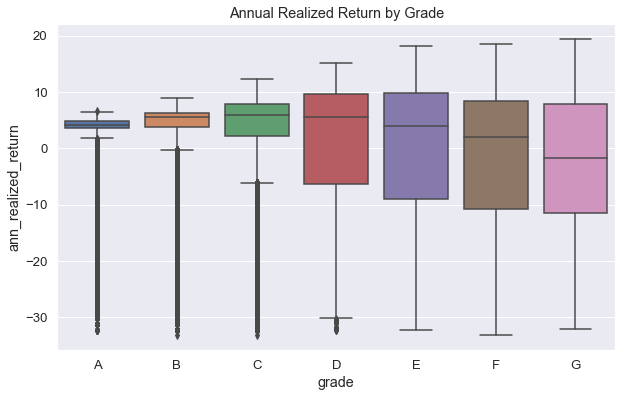

In [67]:
# realized return
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.boxplot(x=eda_df.dropna(subset=['ann_realized_return'])['grade'],
                            y=eda_df.dropna(subset=['ann_realized_return'])['ann_realized_return']*100,
                            order= ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Annual Realized Return by Grade')
plt.show()

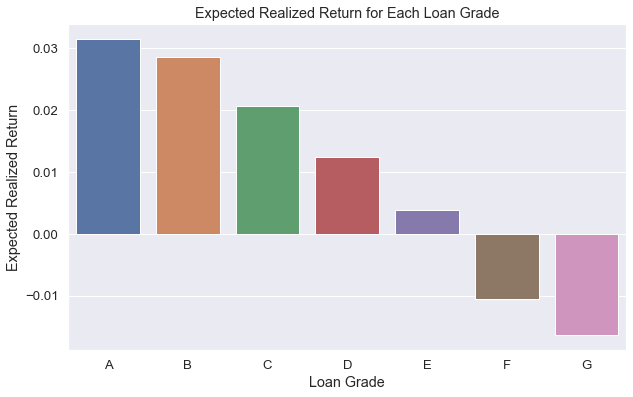

In [65]:
# Group the DataFrame by 'grade' and calculate the mean of 'ann_realized_return'
expected_return = eda_df.groupby('grade')['ann_realized_return'].mean()

# Plot the expected realized return for each loan grade
plt.figure(figsize=(10, 6))
sns.barplot(x=expected_return.index, y=expected_return.values)
plt.xlabel('Loan Grade')
plt.ylabel('Expected Realized Return')
plt.title('Expected Realized Return for Each Loan Grade')
plt.show()


#### Question 2 + 3: Are the available loan data informative, thus can help selecting loans to invest in (i.e. can the data help choose loans better than random selection, or selection by simple criteria, e.g. loan grade)? If the data are indeed informative, what increased performance can be expected, compared to a baseline of simply selecting loans based on their ratings (grades)?

In [41]:
def get_portfolio_return(portfolio_value=10e6, X_test=None, y_test=None, y_pred=None):
    # Select the original loan columns from df_19 using their column names
    results_df = pd.DataFrame(index=X_test.index)
    original_loans = df_19.loc[X_test.index]  

    # Add the selected original loan columns and the predicted annual return values to the DataFrame
    results_df = pd.concat([results_df, original_loans], axis=1)
    results_df['Original Annual Return'] = y_test
    results_df['Predicted Annual Return'] = y_pred

    # sort by grade
    sorted_grade = results_df[['loan_amnt','sub_grade','Original Annual Return','Predicted Annual Return']].sort_values(by='sub_grade', ascending=True)
    # sort by pred
    sorted_pred = results_df[['loan_amnt','sub_grade','Original Annual Return','Predicted Annual Return']].sort_values(by='Predicted Annual Return', ascending=False)

    # portfolio sub grade
    sorted_grade['Running Total Loan Amount'] = sorted_grade['loan_amnt'].cumsum()
    sorted_grade = sorted_grade[sorted_grade['Running Total Loan Amount'] <= portfolio_value]

    # portfolio pred
    sorted_pred['Running Total Loan Amount'] = sorted_pred['loan_amnt'].cumsum()
    sorted_pred = sorted_pred[sorted_pred['Running Total Loan Amount'] <= portfolio_value]
    sorted_pred['loan_weight'] = sorted_pred['loan_amnt']/sorted_pred['loan_amnt'].sum() # add weights

    # grade
    total_return_grade = sum(sorted_grade['loan_amnt'] * (1 + sorted_grade['Original Annual Return']))
    total_invest_grade = sorted_grade['Running Total Loan Amount'].iloc[-1]
    realized_return_grade = total_return_grade / total_invest_grade - 1

    # pred
    total_return_pred = sum(sorted_pred['loan_amnt'] * (1 + sorted_pred['Original Annual Return']))
    total_invest_pred = sorted_pred['Running Total Loan Amount'].iloc[-1]
    realized_return_pred = total_return_pred / total_invest_pred - 1
    
    # pred portfolio variance
    weighted_mean = sorted_pred['Original Annual Return'] @ sorted_pred['loan_weight']
    protfolio_var = (sorted_pred['Original Annual Return'] - weighted_mean)**2 @ sorted_pred['loan_weight']
    protfolio_std = protfolio_var ** 0.5


    print(sorted_pred)

    # lift
    lift = realized_return_pred - realized_return_grade

    return realized_return_grade, realized_return_pred, lift, protfolio_std

In [35]:
# Separate the features and the target variable
X = first_model_df.drop('ann_realized_return', axis=1)
y = first_model_df['ann_realized_return']

# Perform k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

portfolio_values = [5, 10, 20, 50, 100, 200, 400, 500,750,1000]  # Portfolio values in million
lift_values = np.zeros(len(portfolio_values))
return_pred_values = np.zeros(len(portfolio_values))
return_subgrades_values = np.zeros(len(portfolio_values))
std_values = np.zeros(len(portfolio_values)) 

# Folds
for i, portfolio_value in enumerate(portfolio_values):
    lift_sum = 0
    return_pred_sum = 0
    return_subgrade_sum = 0
    std_sum = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create a StandardScaler object
        scaler = StandardScaler()

        # Define the columns to be scaled
        columns_to_scale = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'fico_score',
                            'max_bal_bc', 'all_util', 'bc_open_to_buy', 'tot_hi_cred_lim', 'total_bc_limit']

        # Fit the scaler on X_train and transform X_train
        X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

        # Transform X_test using the fitted scaler from X_train
        X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
        
        poly_features = PolynomialFeatures(degree=2)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)
    
        second_model=LinearRegression()

        # Fit the model to the training data
        second_model.fit(X_train_poly, y_train)

        # Predict the target variable for the test data
        y_pred = second_model.predict(X_test_poly)

        # Calculate and display the portfolio return and lift
        realized_return_grade, realized_return_pred, lift, std = get_portfolio_return(portfolio_value=portfolio_value * 1e6, X_test=X_test, y_test=y_test, y_pred=y_pred)
        lift_sum += lift
        return_pred_sum += realized_return_pred
        return_subgrade_sum += realized_return_grade
        std_sum += std

    avg_lift = lift_sum / k
    avg_return_pred = return_pred_sum / k
    avg_subgrade_return = return_subgrade_sum / k
    avg_std = std_sum / k
    
    lift_values[i] = avg_lift
    return_pred_values[i] = avg_return_pred
    return_subgrades_values[i] = avg_subgrade_return
    std_values[i] = avg_std


In [36]:
# Create a DataFrame with the portfolio values as index and columns for average return predicted and lift
results_df = pd.DataFrame(index=portfolio_values)
results_df.index.name = "Portfolio Value (million)"

# Fill the DataFrame with the average return predicted and lift values
results_df["AVG Model-based portfolio return (%)"] = np.round(return_pred_values *100, 2)
results_df["AVG Subgrade-based portfolio return (%)"] = np.round(return_subgrades_values*100,2)
results_df["AVG Lift over sub-grade selection (%)"] = np.round(lift_values*100, 2)
results_df["Volatility Model-based portfolio (Weighted Std)"] = np.round(std_values, 3)

# Display the DataFrame
display(results_df)

,AVG Model-based portfolio return (%),AVG Subgrade-based portfolio return (%),AVG Lift over sub-grade selection (%),Volatility Model-based portfolio (Weighted Std)
Portfolio Value (million),,,,
5,5.00,2.39,2.61,0.070
10,4.64,2.66,1.98,0.069
20,4.38,2.86,1.52,0.066
50,4.06,2.74,1.32,0.064
100,3.86,2.73,1.13,0.062
200,3.66,2.69,0.97,0.063
400,3.44,2.66,0.77,0.067
500,3.31,2.67,0.64,0.070
750,2.87,2.65,0.22,0.080


In [37]:
print("Q2 + Q3 - AVG Lift over different portfolios budgets: ")
display(results_df[["AVG Lift over sub-grade selection (%)"]])
print("Q2 + Q3 - Our model AVG Lift over sub-grade selection is: {:.3f}%".format(np.mean(results_df['AVG Lift over sub-grade selection (%)'])))

Q2 + Q3 - AVG Lift over different portfolios budgets: 


,AVG Lift over sub-grade selection (%)
Portfolio Value (million),
5,2.61
10,1.98
20,1.52
50,1.32
100,1.13
200,0.97
400,0.77
500,0.64
750,0.22


Q2 + Q3 - Our model AVG Lift over sub-grade selection is: 1.116%


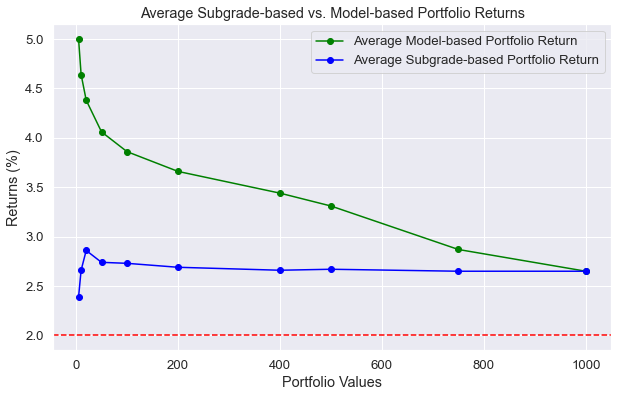

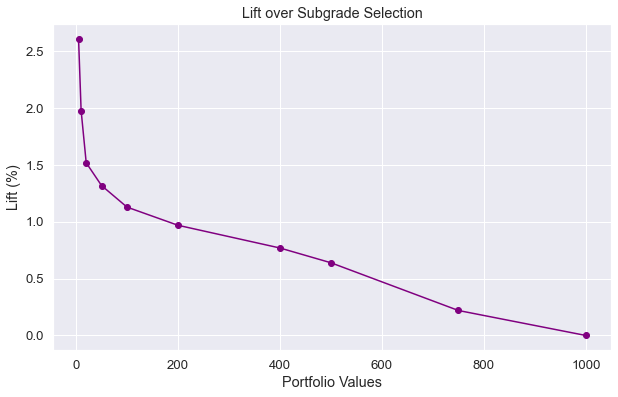

In [69]:
# Plotting the average subgrade and model-based portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(results_df["AVG Model-based portfolio return (%)"], marker='o', linestyle='-', color='green', label='Average Model-based Portfolio Return')
plt.plot(results_df["AVG Subgrade-based portfolio return (%)"], marker='o', linestyle='-', color='blue', label='Average Subgrade-based Portfolio Return')
plt.axhline(y=2, color='red', linestyle='--')  # Add a red dashed line at 2%
plt.xlabel('Portfolio Values')
plt.ylabel('Returns (%)')
plt.title('Average Subgrade-based vs. Model-based Portfolio Returns')
plt.legend()
plt.show()

# Plotting the lift values
plt.figure(figsize=(10, 6))
plt.plot(results_df["AVG Lift over sub-grade selection (%)"], marker='o', linestyle='-', color='purple')
plt.xlabel('Portfolio Values')
plt.ylabel('Lift (%)')
plt.title('Lift over Subgrade Selection')
plt.show()


#### Question 4: What "average" returns can GreatYields expect from investing in peer lending loans? Keep in mind that ultimately, the goal is to maximize returns (i.e. make as much money as possible)

In [38]:
print("Q4 - The AVG returns that Great Yields can expect from investing in peer lending loan is: ")
display(results_df[["AVG Model-based portfolio return (%)"]])

Q4 - The AVG returns that Great Yields can expect from investing in peer lending loan is: 


,AVG Model-based portfolio return (%)
Portfolio Value (million),
5,5.00
10,4.64
20,4.38
50,4.06
100,3.86
200,3.66
400,3.44
500,3.31
750,2.87


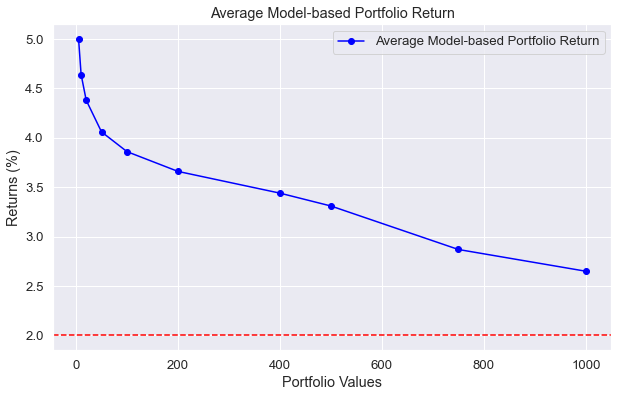

In [60]:
# Plotting the average subgrade and model-based portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(results_df["AVG Model-based portfolio return (%)"], marker='o', linestyle='-', color='blue', label='Average Model-based Portfolio Return')
plt.axhline(y=2, color='red', linestyle='--')  # Add a red dashed line at 2%
plt.xlabel('Portfolio Values')
plt.ylabel('Returns (%)')
plt.title('Average Model-based Portfolio Return')
plt.legend()
plt.show()


#### Question 5: What is the risk level entailed in such investment (as measured by the volatility)? 

In [39]:
print("Q5 - The Risk level that entails in such investment as measured by the volatility is: ")
display(results_df[["Volatility Model-based portfolio (Weighted Std)"]])

Q5 - The Risk level that entails in such investment as measured by the volatility is: 


,Volatility Model-based portfolio (Weighted Std)
Portfolio Value (million),
5,0.070
10,0.069
20,0.066
50,0.064
100,0.062
200,0.063
400,0.067
500,0.070
750,0.080


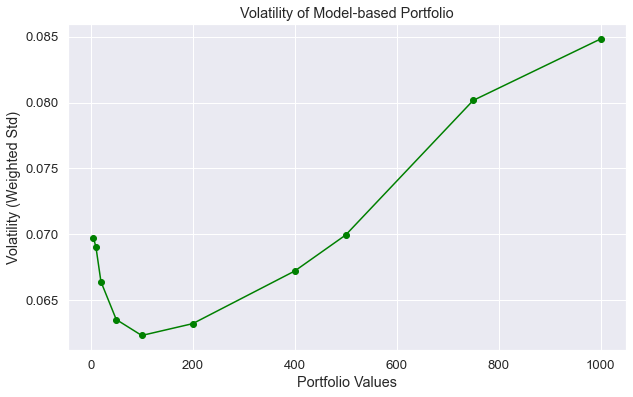

In [58]:
# Plotting the volatility of the model-based portfolio
plt.figure(figsize=(10, 6))
plt.plot(portfolio_values, std_values, marker='o', linestyle='-', color='green')
plt.xlabel('Portfolio Values')
plt.ylabel('Volatility (Weighted Std)')
plt.title('Volatility of Model-based Portfolio')
plt.show()